# Simulation of the Aharonov-Bohm Effect in Traditional QM and X-θ Framework

This notebook simulates the Aharonov-Bohm (AB) effect in both traditional Quantum Mechanics (QM) and an extended X-θ framework. The AB effect demonstrates that quantum particles can be influenced by electromagnetic potentials even in regions where the corresponding fields are zero. The X-θ framework extends this by introducing an internal phase θ, which can also influence quantum interference patterns.

### Magnetic Field Configuration
- **B Field**: Confined within a solenoid, zero outside.
- **Vector Potential (A)**: Non-zero outside the solenoid, leading to quantum interference even when B=0.

### Explanation in Traditional QM
In traditional QM, the Aharonov-Bohm effect is explained by the influence of the vector potential A on the phase of quantum particles, even when the magnetic field B is zero outside the solenoid. This is captured by the phase difference formula:

\[
\Delta \phi = \frac{e}{\hbar} \oint \mathbf{A} \cdot d\mathbf{l}
\]

### X-θ Framework Extension
In the X-θ framework, we introduce an internal phase θ, which extends the configuration space of a particle. This internal phase contributes to the vector potential, allowing for additional modulation of quantum interference patterns:
\[
A_{\theta} = 0.5 \times \sin(\theta)
\]



## Cell 1: Setup and Constants

In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant
e = 1.602176634e-19    # Elementary charge
mu0 = 4 * np.pi * 1e-7 # Permeability of free space

# Parameters for the simulation
B = 1.0  # Magnetic field strength
R = 1.0  # Radius of the solenoid
d = 2.0  # Distance between the two paths
I = 1.0  # Moment of inertia for θ


## Cell 2: Vector Potential Function

In [18]:
#  Vector Potential Function for Traditional QM
def vector_potential_qm(x, y, R, B):
    r = np.sqrt(x**2 + y**2)
    A_phi = np.where(r < R, 0.5 * B * r, 0.5 * B * R**2 / r)
    return A_phi    



# Vector potential for a solenoid in the X-θ framework
def vector_potential_x_theta(x, y, R, B, theta):
    r = np.sqrt(x**2 + y**2)
    A_phi = np.where(r < R, 0.5 * B * r, 0.5 * B * R**2 / r)
    A_theta = 0.5 * np.sin(theta)  # Contribution from θ
    return A_phi + A_theta



## Cell 3: Phase Difference Calculation

In [19]:
#  Phase Difference Calculation for Traditional QM
def phase_difference_qm(B, R, d):
    x1_path = d / 2
    x2_path = -d / 2
    N_points = 1000
    theta_vals = np.linspace(0, 2*np.pi, N_points)

    x1_vals = x1_path * np.cos(theta_vals)
    y1_vals = x1_path * np.sin(theta_vals)
    x2_vals = x2_path * np.cos(theta_vals)
    y2_vals = x2_path * np.sin(theta_vals)

    A1 = vector_potential_qm(x1_vals, y1_vals, R, B)
    A2 = vector_potential_qm(x2_vals, y2_vals, R, B)

    integral1 = np.sum(A1 * x1_path)
    integral2 = np.sum(A2 * x2_path)

    delta_phi = (e / hbar) * (integral1 - integral2)
    return delta_phi
    

# Phase potential for a solenoid in the X-θ framework
def phase_difference_x_theta(B, R, d, theta):
    x1_path = d / 2
    x2_path = -d / 2
    N_points = 1000
    theta_vals = np.linspace(0, 2*np.pi, N_points)

    x1_vals = x1_path * np.cos(theta_vals)
    y1_vals = x1_path * np.sin(theta_vals)
    x2_vals = x2_path * np.cos(theta_vals)
    y2_vals = x2_path * np.sin(theta_vals)

    A1 = vector_potential_x_theta(x1_vals, y1_vals, R, B, theta)
    A2 = vector_potential_x_theta(x2_vals, y2_vals, R, B, theta)

    integral1 = np.sum(A1 * x1_path)
    integral2 = np.sum(A2 * x2_path)

    delta_phi = (e / hbar) * (integral1 - integral2)
    return delta_phi



## Cell 4: Simulation and Plotting

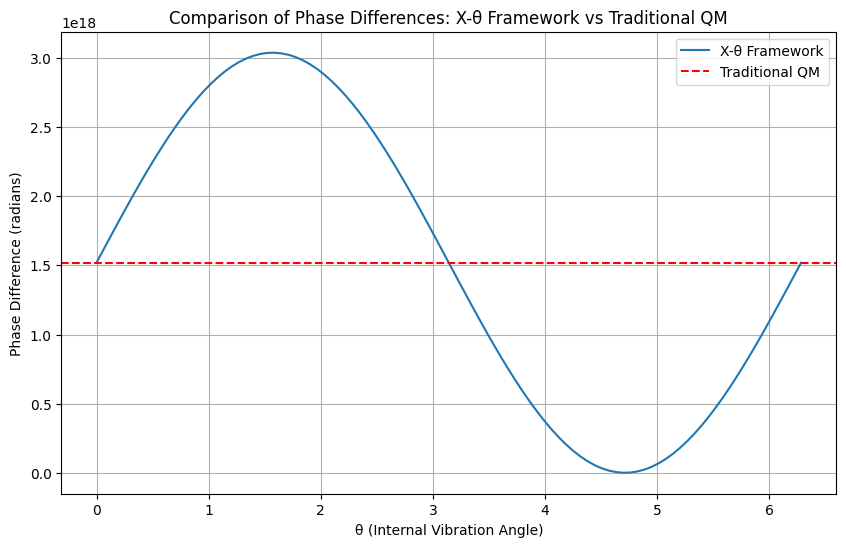

In [20]:
# Calculate phase difference for traditional QM and X-θ framework
delta_phi_qm = phase_difference_qm(B, R, d)
theta_range = np.linspace(0, 2*np.pi, 100)
delta_phi_values_x_theta = [phase_difference_x_theta(B, R, d, theta) for theta in theta_range]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(theta_range, delta_phi_values_x_theta, label='X-θ Framework')
plt.axhline(y=delta_phi_qm, color='r', linestyle='--', label='Traditional QM')
plt.xlabel('θ (Internal Vibration Angle)')
plt.ylabel('Phase Difference (radians)')
plt.title('Comparison of Phase Differences: X-θ Framework vs Traditional QM')
plt.legend()
plt.grid()
plt.show()

## Cell 5: Analysis and Discussion

### Results and Analysis

The plots generated from the simulation will show the phase difference as a function of θ in the X-θ framework compared to the constant phase shift in traditional QM. This visualizes how internal phases can modulate quantum interference and potentially provides new mechanisms for controlling quantum states.

- **Traditional QM**: Demonstrates a constant phase shift due to the vector potential A.
- **X-θ Framework**: Shows modulation of phase shift due to internal phase θ, suggesting new avenues for quantum control and experimentation.

This comparative analysis helps illustrate how extending the traditional framework with internal states like θ could lead to new insights in quantum mechanics.
